In [41]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [42]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [43]:
##Encoding for features Undergrad,Urban,Marital Status
label_encoder = preprocessing.LabelEncoder()
fraud_data['Undergrad']= label_encoder.fit_transform(fraud_data['Undergrad']) 

In [44]:
fraud_data['Marital.Status']= label_encoder.fit_transform(fraud_data['Marital.Status']) 

In [45]:
fraud_data['Urban']= label_encoder.fit_transform(fraud_data['Urban']) 

In [46]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [47]:
fraud_data['Income']="30000"
fraud_data.loc[fraud_data['Taxable.Income']<=30000,'Income']='Risky'
fraud_data.loc[fraud_data['Taxable.Income']>30000,'Income']='Good'

In [48]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [49]:
data_new=fraud_data.drop(columns='Taxable.Income',axis=1)
data_new

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [50]:
scale=MinMaxScaler()
data_norm=scale.fit_transform(data_new.iloc[:,0:5])
data_norm

array([[0.        , 1.        , 0.13947207, 0.33333333, 1.        ],
       [1.        , 0.        , 0.62239438, 0.6       , 1.        ],
       [0.        , 0.5       , 0.77256766, 1.        , 1.        ],
       ...,
       [0.        , 0.        , 0.73723987, 0.        , 1.        ],
       [1.        , 0.5       , 0.88680969, 0.56666667, 0.        ],
       [0.        , 0.        , 0.76068253, 0.53333333, 0.        ]])

In [51]:
data_norm=pd.DataFrame(data_norm,columns=['Undergrad','MaritalStatus','CityPopulation','WorkExp','Urban'])
data_norm

,Undergrad,MaritalStatus,CityPopulation,WorkExp,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [52]:
data_norm['Income']=fraud_data['Income']
data_norm

,Undergrad,MaritalStatus,CityPopulation,WorkExp,Urban,Income
0,0.0,1.0,0.139472,0.333333,1.0,Good
1,1.0,0.0,0.622394,0.600000,1.0,Good
2,0.0,0.5,0.772568,1.000000,1.0,Good
3,1.0,1.0,0.962563,0.500000,1.0,Good
4,0.0,0.5,0.010081,0.933333,0.0,Good
...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,Good
596,1.0,0.0,0.170058,0.066667,1.0,Good
597,0.0,0.0,0.737240,0.000000,1.0,Good
598,1.0,0.5,0.886810,0.566667,0.0,Good


In [53]:
df_income=pd.get_dummies(data_norm['Income'])
df_income

,Good,Risky
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
595,1,0
596,1,0
597,1,0
598,1,0


In [54]:
data_norm=pd.concat((data_norm,df_income),axis=1)
data_norm

,Undergrad,MaritalStatus,CityPopulation,WorkExp,Urban,Income,Good,Risky
0,0.0,1.0,0.139472,0.333333,1.0,Good,1,0
1,1.0,0.0,0.622394,0.600000,1.0,Good,1,0
2,0.0,0.5,0.772568,1.000000,1.0,Good,1,0
3,1.0,1.0,0.962563,0.500000,1.0,Good,1,0
4,0.0,0.5,0.010081,0.933333,0.0,Good,1,0
...,...,...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,Good,1,0
596,1.0,0.0,0.170058,0.066667,1.0,Good,1,0
597,0.0,0.0,0.737240,0.000000,1.0,Good,1,0
598,1.0,0.5,0.886810,0.566667,0.0,Good,1,0


In [55]:
data_norm=data_norm.drop('Income',axis=1)
data_norm

,Undergrad,MaritalStatus,CityPopulation,WorkExp,Urban,Good,Risky
0,0.0,1.0,0.139472,0.333333,1.0,1,0
1,1.0,0.0,0.622394,0.600000,1.0,1,0
2,0.0,0.5,0.772568,1.000000,1.0,1,0
3,1.0,1.0,0.962563,0.500000,1.0,1,0
4,0.0,0.5,0.010081,0.933333,0.0,1,0
...,...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,1,0
596,1.0,0.0,0.170058,0.066667,1.0,1,0
597,0.0,0.0,0.737240,0.000000,1.0,1,0
598,1.0,0.5,0.886810,0.566667,0.0,1,0


In [56]:
data_norm=data_norm.rename(columns={'Risky':'Income'})
data_norm

,Undergrad,MaritalStatus,CityPopulation,WorkExp,Urban,Good,Income
0,0.0,1.0,0.139472,0.333333,1.0,1,0
1,1.0,0.0,0.622394,0.600000,1.0,1,0
2,0.0,0.5,0.772568,1.000000,1.0,1,0
3,1.0,1.0,0.962563,0.500000,1.0,1,0
4,0.0,0.5,0.010081,0.933333,0.0,1,0
...,...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,1,0
596,1.0,0.0,0.170058,0.066667,1.0,1,0
597,0.0,0.0,0.737240,0.000000,1.0,1,0
598,1.0,0.5,0.886810,0.566667,0.0,1,0


In [116]:
data_norm=data_norm.drop('Good',axis=1)
data_norm

,Undergrad,MaritalStatus,CityPopulation,WorkExp,Urban,Income
0,0.0,1.0,0.139472,0.333333,1.0,0
1,1.0,0.0,0.622394,0.600000,1.0,0
2,0.0,0.5,0.772568,1.000000,1.0,0
3,1.0,1.0,0.962563,0.500000,1.0,0
4,0.0,0.5,0.010081,0.933333,0.0,0
...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,0
596,1.0,0.0,0.170058,0.066667,1.0,0
597,0.0,0.0,0.737240,0.000000,1.0,0
598,1.0,0.5,0.886810,0.566667,0.0,0


In [117]:
data_norm['Income'].value_counts()

0    476
1    124
Name: Income, dtype: int64

In [58]:
##Assigning columns to x and y variable
x=data_norm.iloc[:,0:5]
y=data_norm.iloc[:,5]


In [59]:
##Performing Train Test Split on data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# Building a Decision Tree Model

In [60]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model=model.fit(x_train,y_train)

In [61]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

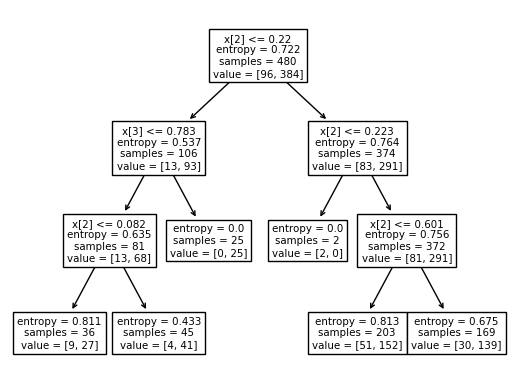

In [62]:
tree.plot_tree(model);

In [63]:
fn=['Undergrad','MaritalStatus','CityPopulation','WorkExp','Urban']
cn=['Good','Risky']

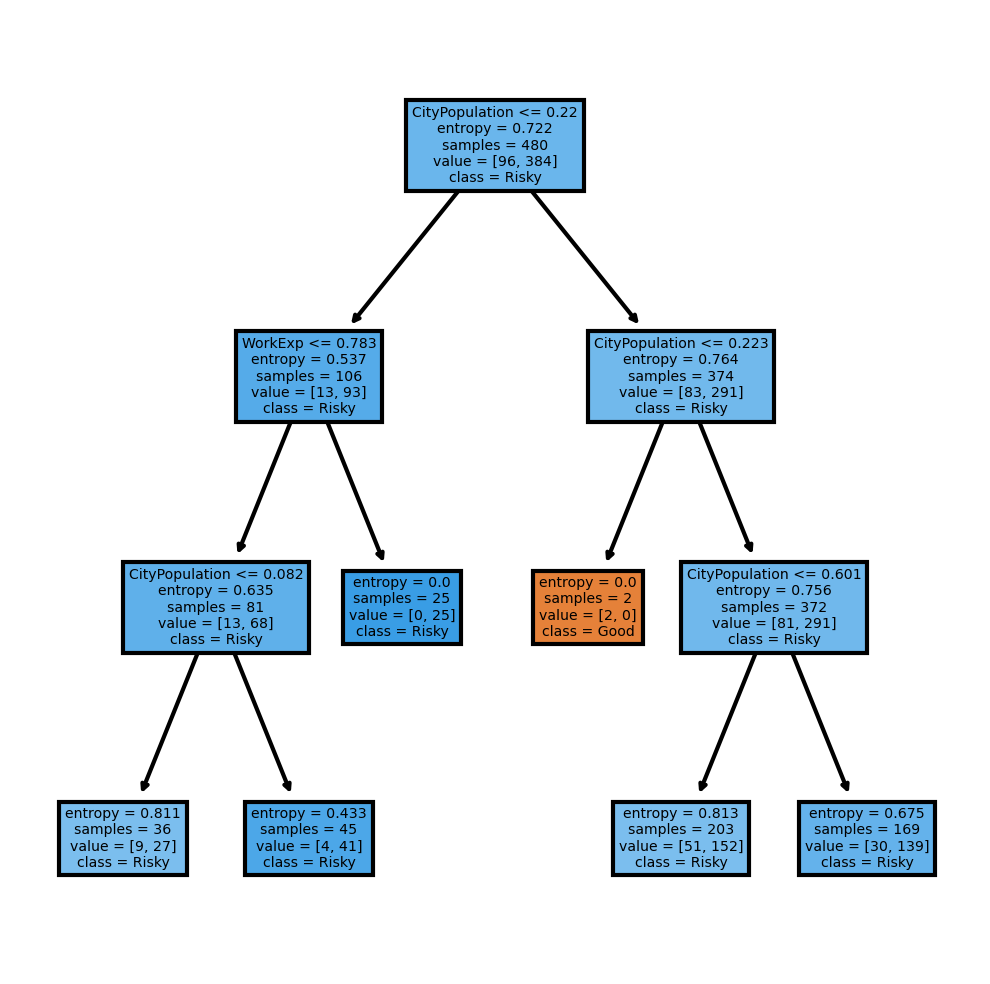

In [64]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [65]:
text=tree.export_text(model,max_depth=3)
print(text)

|--- feature_2 <= 0.22
|   |--- feature_3 <= 0.78
|   |   |--- feature_2 <= 0.08
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.08
|   |   |   |--- class: 1
|   |--- feature_3 >  0.78
|   |   |--- class: 1
|--- feature_2 >  0.22
|   |--- feature_2 <= 0.22
|   |   |--- class: 0
|   |--- feature_2 >  0.22
|   |   |--- feature_2 <= 0.60
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.60
|   |   |   |--- class: 1



In [66]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [67]:
feature_imp=pd.Series(model.feature_importances_,index=fn)

In [68]:
feature_imp

Undergrad         0.000000
MaritalStatus     0.000000
CityPopulation    0.710037
WorkExp           0.289963
Urban             0.000000
dtype: float64

In [69]:
feature_imp.sort_values(ascending=False)

CityPopulation    0.710037
WorkExp           0.289963
Undergrad         0.000000
MaritalStatus     0.000000
Urban             0.000000
dtype: float64

In [70]:
##Predictions on test Data
pred=model.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [71]:
pred=pd.Series(pred)
pred

0      1
1      1
2      1
3      1
4      1
      ..
115    1
116    1
117    1
118    1
119    1
Length: 120, dtype: uint8

In [72]:
pred.value_counts()

1    120
dtype: int64

In [73]:
y_test.value_counts()

1    92
0    28
Name: Good, dtype: int64

In [74]:
pd.crosstab(y_test,pred)

col_0,1
Good,
0,10
1,14


In [75]:
acc=accuracy_score(y_test,pred)*100
acc


76.66666666666667

# Building a model with gini Impurity

In [76]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=3)
model1=model1.fit(x_train,y_train)

In [77]:
model1

DecisionTreeClassifier(max_depth=3)

[Text(0.5416666666666666, 0.875, 'CityPopulation <= 0.22\ngini = 0.32\nsamples = 480\nvalue = [96, 384]\nclass = Risky'),
 Text(0.3333333333333333, 0.625, 'CityPopulation <= 0.082\ngini = 0.215\nsamples = 106\nvalue = [13, 93]\nclass = Risky'),
 Text(0.16666666666666666, 0.375, 'CityPopulation <= 0.08\ngini = 0.331\nsamples = 43\nvalue = [9, 34]\nclass = Risky'),
 Text(0.08333333333333333, 0.125, 'gini = 0.308\nsamples = 42\nvalue = [8, 34]\nclass = Risky'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Good'),
 Text(0.5, 0.375, 'Urban <= 0.5\ngini = 0.119\nsamples = 63\nvalue = [4, 59]\nclass = Risky'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]\nclass = Risky'),
 Text(0.5833333333333334, 0.125, 'gini = 0.202\nsamples = 35\nvalue = [4, 31]\nclass = Risky'),
 Text(0.75, 0.625, 'CityPopulation <= 0.223\ngini = 0.345\nsamples = 374\nvalue = [83, 291]\nclass = Risky'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue 

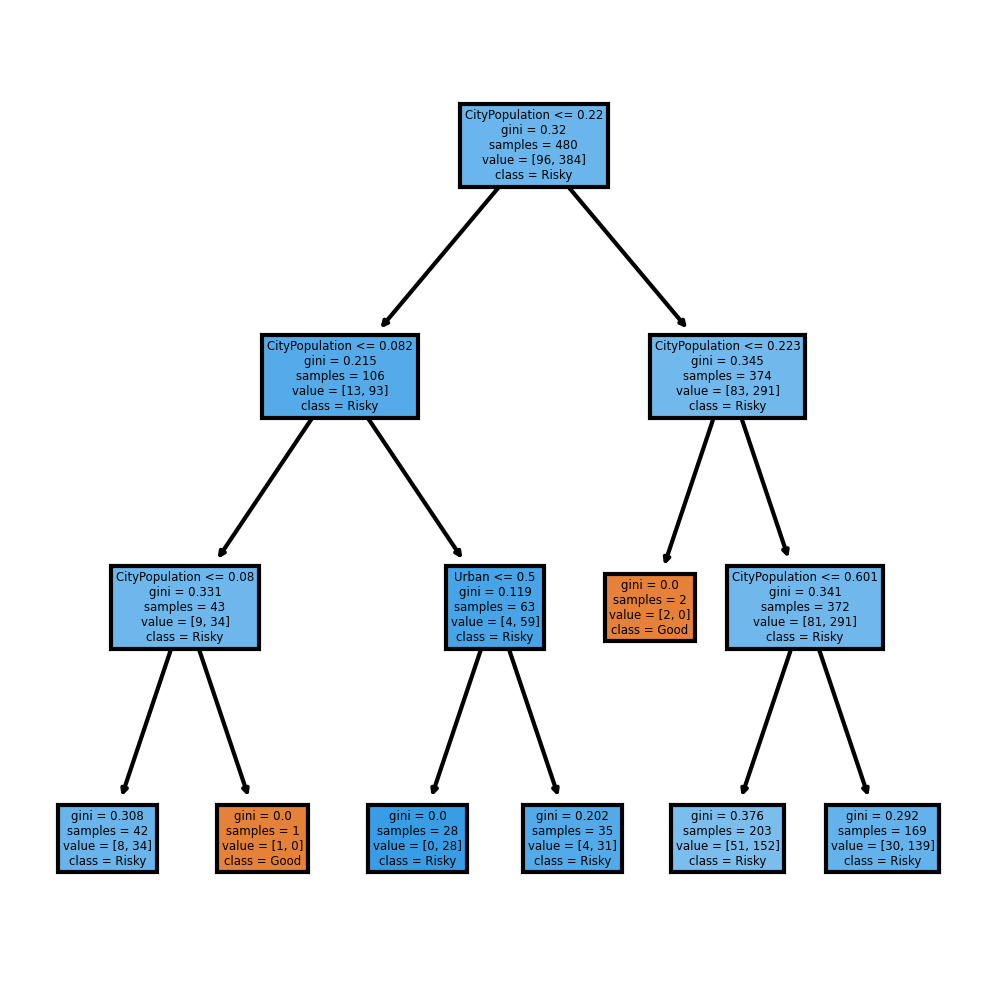

In [78]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,class_names=cn,feature_names=fn,filled=True)

In [79]:
model1.feature_importances_

array([0.        , 0.        , 0.94815922, 0.        , 0.05184078])

In [80]:
#City Population has more importance
feature_imp=pd.Series(model1.feature_importances_,index=fn)
feature_imp.sort_values(ascending=False)

CityPopulation    0.948159
Urban             0.051841
Undergrad         0.000000
MaritalStatus     0.000000
WorkExp           0.000000
dtype: float64

In [81]:
y_pred=model1.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [82]:
acc=accuracy_score(y_test,y_pred)*100
acc

75.83333333333333

In [83]:
confusion_matrix(y_test,y_pred)

array([[ 0, 28],
       [ 1, 91]], dtype=int64)

# Decision Tree for Company Data

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [121]:
data=pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [122]:
##EDA
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [123]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [124]:
data['Urban'].value_counts(),data['US'].value_counts()

(Yes    282
 No     118
 Name: Urban, dtype: int64,
 Yes    258
 No     142
 Name: US, dtype: int64)

In [125]:
data_new=data
columns=['ShelveLoc','Urban','US']
encode=preprocessing.LabelEncoder()

for i in columns:
    data_new[i]=encode.fit_transform(data_new[i])
data_new

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [126]:
data_new['Sales'].median()

7.49

In [127]:
data_new.loc[data_new['Sales']>=7.49,'sales']=1
data_new.loc[data_new['Sales']<7.49,'sales']=0
data_new=data_new.drop('Sales',axis=1)
data_new

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1.0
1,111,48,16,260,83,1,65,10,1,1,1.0
2,113,35,10,269,80,2,59,12,1,1,1.0
3,117,100,4,466,97,2,55,14,1,1,0.0
4,141,64,3,340,128,0,38,13,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1.0
396,139,23,3,37,120,2,55,11,0,1,0.0
397,162,26,12,368,159,2,40,18,1,1,0.0
398,100,79,7,284,95,0,50,12,1,1,0.0


In [128]:
##Assigning calumns to variables
x=data_new.iloc[:,0:10]
y=data_new.iloc[:,10]

In [129]:
##Apply Train_Test_Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)


In [130]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280, 10), (120, 10), (280,), (120,))

# Build a Decision Tree using CART-gini model

In [132]:

clf=DecisionTreeClassifier(criterion='gini',max_depth=3)
clf=clf.fit(x_train,y_train)


In [133]:
data_new.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales'],
      dtype='object')

In [134]:
fn=['CompPrice','Income','Advertising','Population','Price','SelveLoc','Age','Education','Urban','US']
cn=['Low Risk','High Risk']

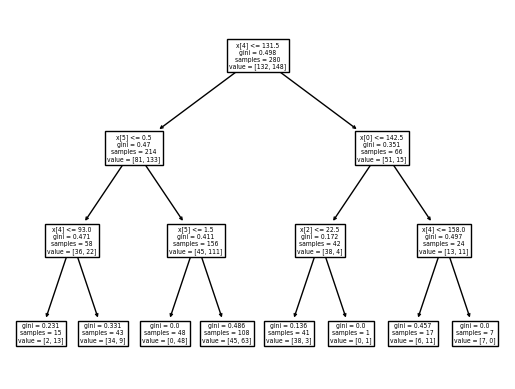

In [135]:
#3Plot decision tree
tree.plot_tree(clf);

[Text(0.5, 0.875, 'Price <= 131.5\ngini = 0.498\nsamples = 280\nvalue = [148, 132]\nclass = Low Risk'),
 Text(0.25, 0.625, 'SelveLoc <= 0.5\ngini = 0.47\nsamples = 214\nvalue = [133, 81]\nclass = Low Risk'),
 Text(0.125, 0.375, 'Price <= 93.0\ngini = 0.471\nsamples = 58\nvalue = [22, 36]\nclass = High Risk'),
 Text(0.0625, 0.125, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = Low Risk'),
 Text(0.1875, 0.125, 'gini = 0.331\nsamples = 43\nvalue = [9, 34]\nclass = High Risk'),
 Text(0.375, 0.375, 'SelveLoc <= 1.5\ngini = 0.411\nsamples = 156\nvalue = [111, 45]\nclass = Low Risk'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]\nclass = Low Risk'),
 Text(0.4375, 0.125, 'gini = 0.486\nsamples = 108\nvalue = [63, 45]\nclass = Low Risk'),
 Text(0.75, 0.625, 'CompPrice <= 142.5\ngini = 0.351\nsamples = 66\nvalue = [15, 51]\nclass = High Risk'),
 Text(0.625, 0.375, 'Advertising <= 22.5\ngini = 0.172\nsamples = 42\nvalue = [4, 38]\nclass = High Risk'),
 Text(0.5625, 0.125

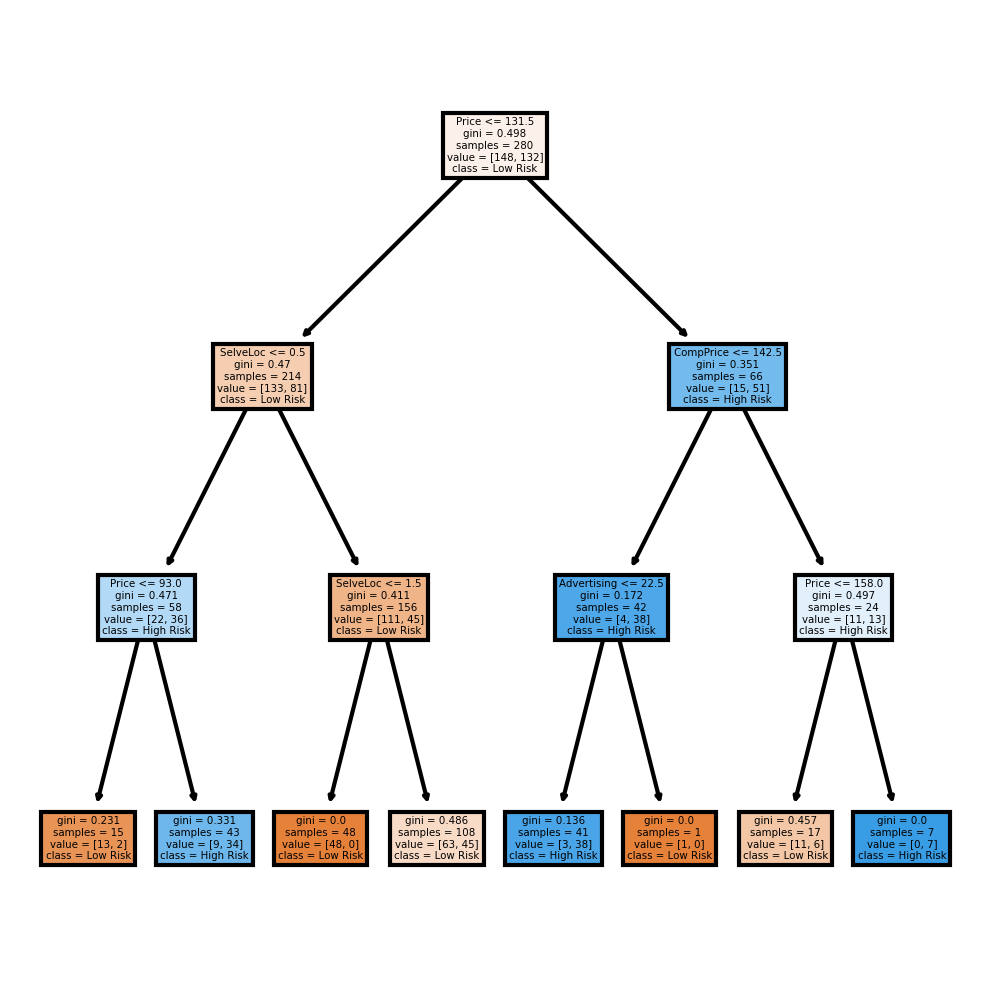

In [99]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,class_names=cn,feature_names=fn,filled=True)

In [136]:
text=tree.export_text(clf,max_depth=3)
print(text)

|--- feature_4 <= 131.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_4 <= 93.00
|   |   |   |--- class: 1.0
|   |   |--- feature_4 >  93.00
|   |   |   |--- class: 0.0
|   |--- feature_5 >  0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- class: 1.0
|   |   |--- feature_5 >  1.50
|   |   |   |--- class: 1.0
|--- feature_4 >  131.50
|   |--- feature_0 <= 142.50
|   |   |--- feature_2 <= 22.50
|   |   |   |--- class: 0.0
|   |   |--- feature_2 >  22.50
|   |   |   |--- class: 1.0
|   |--- feature_0 >  142.50
|   |   |--- feature_4 <= 158.00
|   |   |   |--- class: 1.0
|   |   |--- feature_4 >  158.00
|   |   |   |--- class: 0.0



In [137]:
clf.feature_importances_

array([0.07188868, 0.        , 0.02993897, 0.        , 0.52557932,
       0.37259303, 0.        , 0.        , 0.        , 0.        ])

In [138]:
clf.feature_names_in_

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], dtype=object)

In [139]:
feature_imp=pd.Series(clf.feature_importances_,index=fn)
feature_imp.sort_values(ascending=False)

Price          0.525579
SelveLoc       0.372593
CompPrice      0.071889
Advertising    0.029939
Income         0.000000
Population     0.000000
Age            0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

In [104]:
##Price feature has more influence

In [140]:
pred=clf.predict(x_test)

In [141]:
pred=pd.DataFrame(pred)
pred

,0
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
115,0.0
116,1.0
117,1.0
118,1.0


In [142]:
accuracy_gini=accuracy_score(y_test,pred)
accuracy_gini=accuracy_gini*100
accuracy_gini

64.16666666666667

In [143]:
confusion_matrix(y_test,pred)

array([[31, 36],
       [ 7, 46]], dtype=int64)

# Building a model with C5 Entropy Method

In [144]:
dt_ent=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_ent=dt_ent.fit(x_train,y_train)

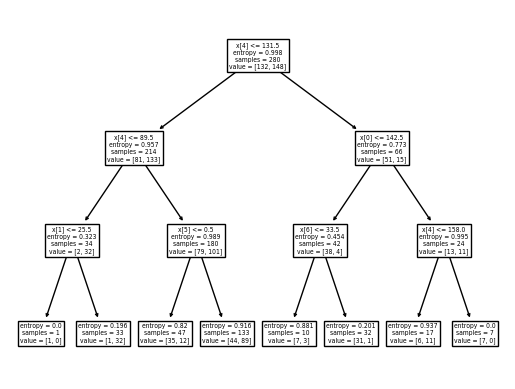

In [145]:
tree.plot_tree(dt_ent);

[Text(0.5, 0.875, 'Price <= 131.5\nentropy = 0.998\nsamples = 280\nvalue = [132, 148]\nclass = High Risk'),
 Text(0.25, 0.625, 'Price <= 89.5\nentropy = 0.957\nsamples = 214\nvalue = [81, 133]\nclass = High Risk'),
 Text(0.125, 0.375, 'Income <= 25.5\nentropy = 0.323\nsamples = 34\nvalue = [2, 32]\nclass = High Risk'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Low Risk'),
 Text(0.1875, 0.125, 'entropy = 0.196\nsamples = 33\nvalue = [1, 32]\nclass = High Risk'),
 Text(0.375, 0.375, 'SelveLoc <= 0.5\nentropy = 0.989\nsamples = 180\nvalue = [79, 101]\nclass = High Risk'),
 Text(0.3125, 0.125, 'entropy = 0.82\nsamples = 47\nvalue = [35, 12]\nclass = Low Risk'),
 Text(0.4375, 0.125, 'entropy = 0.916\nsamples = 133\nvalue = [44, 89]\nclass = High Risk'),
 Text(0.75, 0.625, 'CompPrice <= 142.5\nentropy = 0.773\nsamples = 66\nvalue = [51, 15]\nclass = Low Risk'),
 Text(0.625, 0.375, 'Age <= 33.5\nentropy = 0.454\nsamples = 42\nvalue = [38, 4]\nclass = Low Risk')

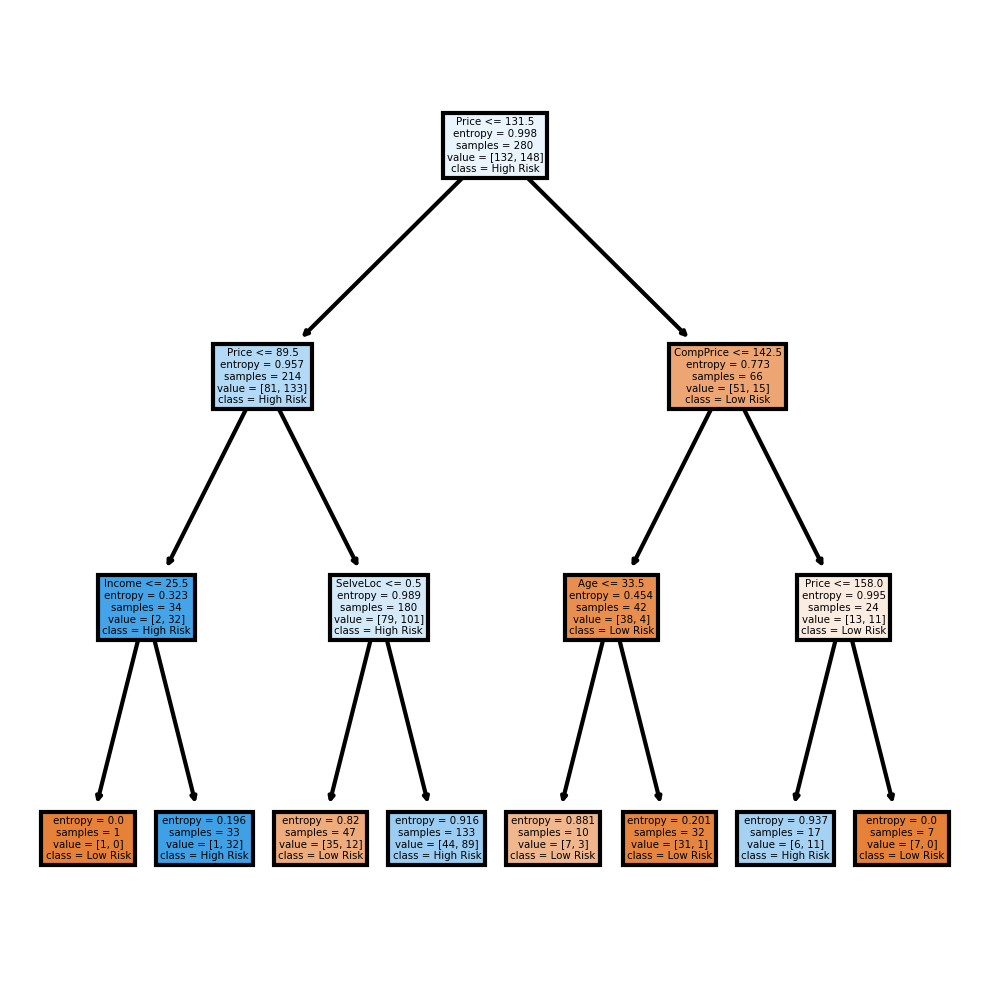

In [146]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_ent,class_names=cn,feature_names=fn,filled=True)

In [147]:
y_pred=dt_ent.predict(x_test)
y_pred

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1.])

In [148]:
confusionmatrix=confusion_matrix(y_test,y_pred)
confusionmatrix

array([[32, 35],
       [ 8, 45]], dtype=int64)

In [149]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_ent=accuracy*100
accuracy_ent

64.16666666666667

In [115]:
##Both c5 model and CART models have same accuracy.